<a href="https://colab.research.google.com/github/Sabbir-Asif/Skin_Detection/blob/main/skinDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/ibtd.zip

/content/drive/MyDrive/ibtd.zip


In [ ]:
!unzip /content/drive/MyDrive/ibtd.zip

**New block created**

#**Skin Detection Using Python**



1. Importing Libraries

In [ ]:
#Importing Libraries
import os
import cv2
import numpy as np

2. Defining function for reading image

In [ ]:

def countSkinNonSkinPixels(img_data, mask_data):
    global total_skin, total_non_skin
    total_skin = 0
    total_non_skin = 0

    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            mask_pixel = mask_data[i, j]

            # Check if the pixel in the mask is white (non-skin)
            if mask_pixel[0] > 230 and mask_pixel[1] > 230 and mask_pixel[2] > 230:
                # Increment the count for non-skin pixels
                nonSkin[pixel[0], pixel[1], pixel[2]] = nonSkin[pixel[0], pixel[1], pixel[2]] + 1
                total_non_skin = total_non_skin + 1
            else:
                skin[pixel[0], pixel[1], pixel[2]] =  skin[pixel[0], pixel[1], pixel[2]] + 1
                total_skin = total_skin + 1


In [ ]:
#Calculate Probability

def calcProbability():

  for i in range(255):
    for j in range(255):
      for k in range(255):
        if total_skin != 0 and total_non_skin != 0:
          pcs = skin[i, j, k] / total_skin
          pcns = nonSkin[i, j, k] / total_non_skin
        if pcns != 0:
          probability[i, j, k] = pcs / pcns


In [ ]:

# Function for reading image
def read_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Unable to read the image at {image_path}")
        return None

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_data_2d = np.array(img_rgb)

    return img_data_2d

# Directory containing image files
directory = "/content/ibtd/"

# Initialize the color array with zeros
global  skin, nonSkin, probability
skin = np.zeros((256, 256, 256), dtype=np.uint32)
nonSkin = np.zeros((256, 256, 256), dtype=np.uint32)
probability = np.zeros((256, 256, 256), dtype=np.float64)

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        image_path = os.path.join(directory, filename)
        mask_path = os.path.join("/content/ibtd/Mask/",f"{filename[:-4]}.bmp")
        img_data = read_image(image_path)
        mask_data = read_image(mask_path)

        # Check if the image was successfully loaded
        if img_data is not None:
            print(f"Image {filename} loaded successfully")

        if mask_data is not None:
            print(f"Mask for {filename} loaded successfully")

        countSkinNonSkinPixels(img_data, mask_data)


calcProbability()

Image 0418.jpg loaded successfully
Mask for 0418.jpg loaded successfully
Image 0095.jpg loaded successfully
Mask for 0095.jpg loaded successfully
Image 0202.jpg loaded successfully
Mask for 0202.jpg loaded successfully
Image 0292.jpg loaded successfully
Mask for 0292.jpg loaded successfully
Image 0402.jpg loaded successfully
Mask for 0402.jpg loaded successfully
Image 0019.jpg loaded successfully
Mask for 0019.jpg loaded successfully
Image 0056.jpg loaded successfully
Mask for 0056.jpg loaded successfully
Image 0096.jpg loaded successfully
Mask for 0096.jpg loaded successfully
Image 0066.jpg loaded successfully
Mask for 0066.jpg loaded successfully
Image 0315.jpg loaded successfully
Mask for 0315.jpg loaded successfully
Image 0070.jpg loaded successfully
Mask for 0070.jpg loaded successfully
Image 0180.jpg loaded successfully
Mask for 0180.jpg loaded successfully
Image 0299.jpg loaded successfully
Mask for 0299.jpg loaded successfully
Image 0429.jpg loaded successfully
Mask for 0429.jp

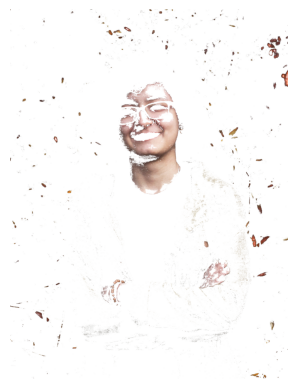

In [19]:
#testing
import matplotlib.pyplot as plt
test_img = read_image("/content/drive/MyDrive/test_data/girl.jpg")
threshold_value = 0.4

# Iterate over each pixel in the image
for i in range(test_img.shape[0]):
    for j in range(test_img.shape[1]):
        pixel_probability = probability[test_img[i, j, 0], test_img[i, j, 1], test_img[i, j, 2]]

        # Check if the probability is less than the threshold
        if abs(pixel_probability) < threshold_value:
            # Set the pixel values to 255 (white)
            test_img[i, j] = [255, 255, 255]

# Display the thresholded image
plt.imshow(test_img)
plt.axis('off')
plt.show()